The Sharpe ratio tells you the "Risk-adjusted" returns of an investment. OR "How much return do you get for every unit of risk you take"

Here’s an example:

Stock A returned 20%

Stock B returned 25%

Which is the better investment?

You’re going to say Stock B because it returned more. What if I told you Stock A has 10% volatility and Stock B has 70% volatility? Then it’s not so clear. The Sharpe ratio takes this into account. A Sharpe ratio over 1 is generally considered “good.”

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [39]:
data = yf.download(['AAPL', 'SPY']
, start="2020-01-01", end="2023-01-01", auto_adjust=False)


[*********************100%***********************]  2 of 2 completed


In [40]:
print(data.head())

Price       Adj Close                  Close                   High  \
Ticker           AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2020-01-02  72.620857  300.291504  75.087502  324.869995  75.150002   
2020-01-03  71.914818  298.017731  74.357498  322.410004  75.144997   
2020-01-06  72.487846  299.154633  74.949997  323.640015  74.989998   
2020-01-07  72.146935  298.313507  74.597504  322.730011  75.224998   
2020-01-08  73.307510  299.903381  75.797501  324.450012  76.110001   

Price                         Low                   Open              \
Ticker             SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2020-01-02  324.890015  73.797501  322.529999  74.059998  323.540009   
2020-01-03  323.640015  74.125000  321.100006  74.287498  321.160004   
2020-01-06  323.730011  73.187500  320.359985  73.447502  320.489990   

In [41]:
print(data.columns)

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])


In [42]:
closes = data['Adj Close']
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

In [48]:
def sharpe_ratio(returns, adjustment_factor = 0.0):
    """
    Determines the Sharpe ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sharpe_ratio : float
    """
    
    risk_adj_returns = returns - adjustment_factor
    return risk_adj_returns.mean()/ risk_adj_returns.std() *  np.sqrt(252)

In the oiriginal work by william sharpe, the adjustment factor was the risk-free rate, (We take it as 0 as Rf has been nearly 0 since a decade)

In [52]:
sharpe_ratio(spy_returns)


0.40727342349586093

In [53]:
sharpe_ratio(aapl_returns)

0.6985840910271434

<Axes: xlabel='Date'>

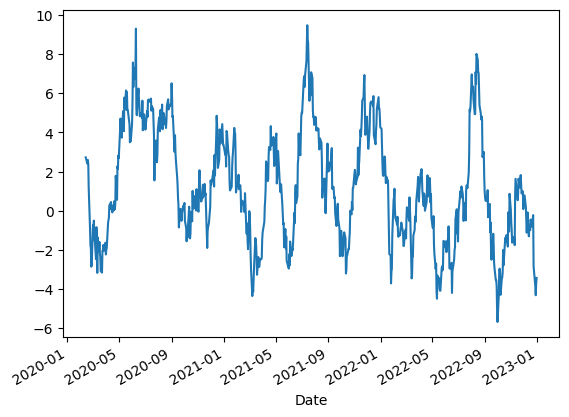

In [54]:
aapl_returns.rolling(30).apply(sharpe_ratio).plot()

<Axes: xlabel='Date'>

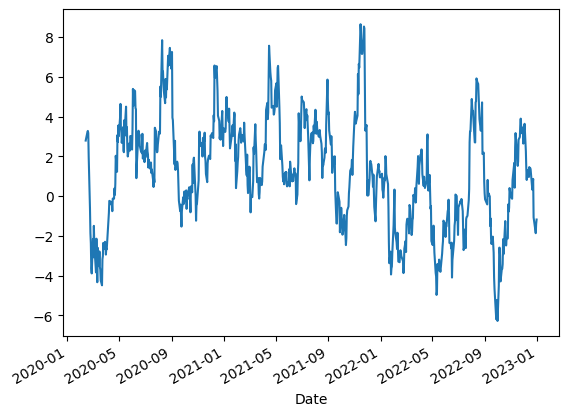

In [55]:
spy_returns.rolling(30).apply(sharpe_ratio).plot()

<Axes: >

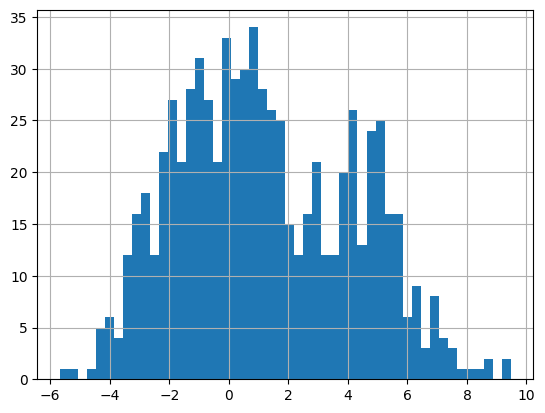

In [56]:
aapl_returns.rolling(30).apply(sharpe_ratio).hist(bins=50)

<Axes: >

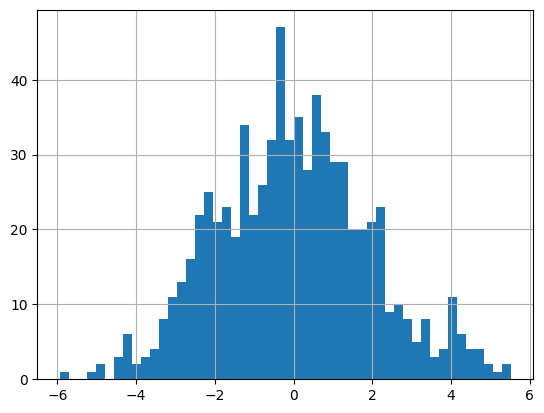

In [57]:
(
    aapl_returns.rolling(30).apply(sharpe_ratio)
    - spy_returns.rolling(30).apply(sharpe_ratio)
).hist(bins=50)